L'image a été téléchargée sous : lenna.png


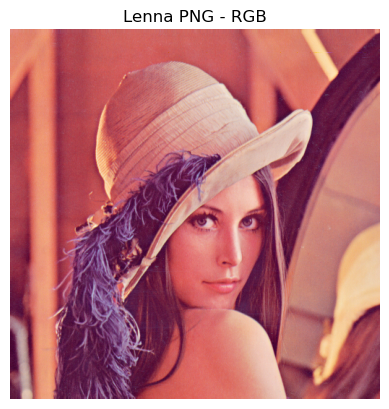

In [80]:
import urllib.request
import cv2
import matplotlib.pyplot as plt
import os

# Télécharger l'image PNG
url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
filename = "lenna.png"

urllib.request.urlretrieve(url, filename)
print(f"L'image a été téléchargée sous : {filename}")

# Charger et afficher l'image en RGB
img = cv2.imread(filename)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.title("Lenna PNG - RGB")
plt.show()



In [82]:
import urllib.request
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Vd-Orig.png/512px-Vd-Orig.png"
urllib.request.urlretrieve(url, "image1.PNG")

image_list = ["image1.PNG"]


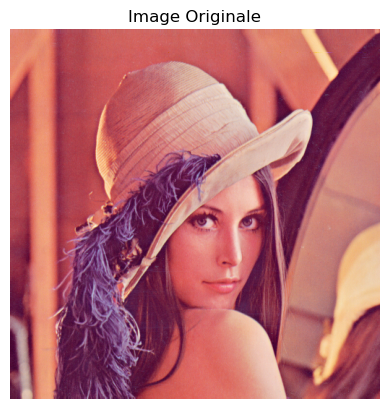

In [88]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# === Chargement d'image ===
def image_load(path, channel=3):
    assert os.path.exists(path), " Chemin invalide"
    if channel == 1:
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    elif channel == 3:
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        raise ValueError("channel doit être 1 (Grayscale) ou 3 (RGB)")
    assert image is not None, " Échec du chargement"
    return image

# === Exemple d'utilisation ===
image = image_load("sample.jpg", channel=3)
plt.imshow(image)
plt.title("Image Originale")
plt.axis("off")
plt.show()
plt.imsave("original_image.png", image)


In [90]:
%matplotlib inline

# === Convolution ===
def convolve_channel(image, kernel, pad_mode='reflect'):
    kh, kw = kernel.shape
    ih, iw = image.shape
    assert ih >= kh and iw >= kw, "Image trop petite pour le noyau"
    pad_h, pad_w = kh // 2, kw // 2
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode=pad_mode)
    output = np.zeros_like(image, dtype=np.float32)
    for i in range(ih):
        for j in range(iw):
            region = padded[i:i+kh, j:j+kw]
            output[i, j] = np.sum(region * kernel)
    return output

def apply_convolution(image, kernel, pad_mode='reflect'):
    assert isinstance(image, np.ndarray)
    assert isinstance(kernel, np.ndarray)
    assert kernel.shape[0] == kernel.shape[1] and kernel.shape[0] % 2 == 1
    if len(image.shape) == 3:
        assert image.shape[2] == 3
        output = np.zeros_like(image, dtype=np.float32)
        for c in range(3):
            output[:, :, c] = convolve_channel(image[:, :, c], kernel, pad_mode)
    else:
        output = convolve_channel(image, kernel, pad_mode)
    return np.clip(output, 0, 255).astype(np.uint8)

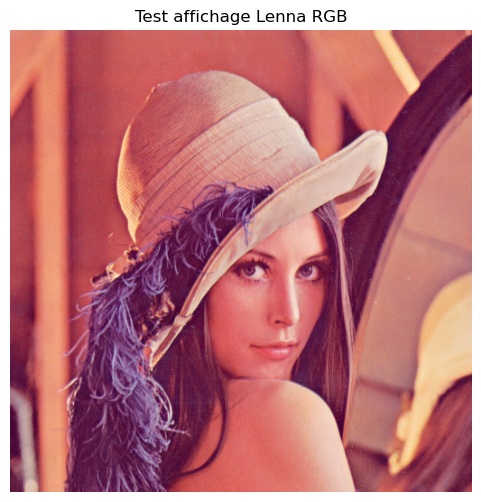

In [92]:
import urllib.request
import cv2
import matplotlib.pyplot as plt
import os

# Télécharger Lenna PNG
url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
filename = "lenna.png"
urllib.request.urlretrieve(url, filename)

# Lire et convertir
img = cv2.imread(filename)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Affichage test
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.title("Test affichage Lenna RGB")
plt.axis('off')
plt.show()


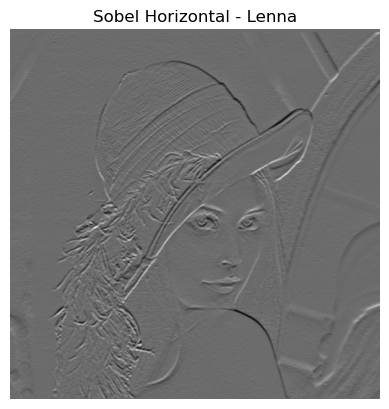

In [94]:
import urllib.request, cv2, os
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

# Télécharger
url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
filename = "lenna.png"
if not os.path.exists(filename):
    urllib.request.urlretrieve(url, filename)
    print("Image téléchargée")

# Lire
img = cv2.imread(filename)
if img is None:
    raise ValueError(" L’image n’a pas été chargée correctement.")

# Convertir en niveaux de gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Filtre Sobel horizontal
sobel_horizontal = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

def apply_convolution_gray(image, kernel):
    return convolve2d(image, kernel, mode='same', boundary='symm')

# Appliquer filtre
filtered = apply_convolution_gray(gray, sobel_horizontal)

# Affichage
plt.imshow(filtered, cmap='gray')
plt.axis('off')
plt.title("Sobel Horizontal - Lenna")
plt.show()


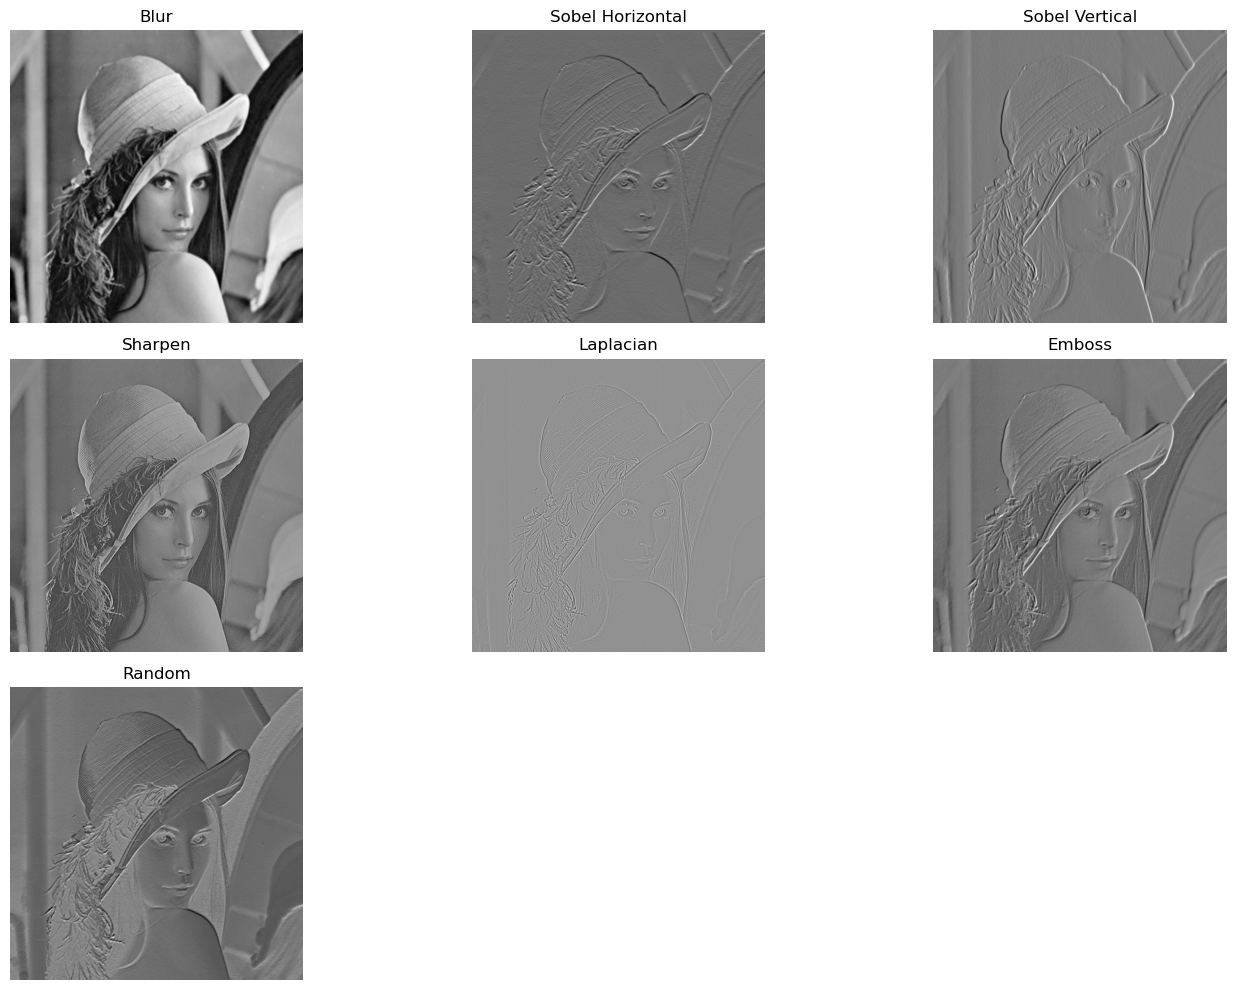

Saved: lenna_blur.png
Saved: lenna_sobel_horizontal.png
Saved: lenna_sobel_vertical.png
Saved: lenna_sharpen.png
Saved: lenna_laplacian.png
Saved: lenna_emboss.png
Saved: lenna_random.png


In [120]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from scipy.signal import convolve2d

# Download Lenna image
url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
filename = "lenna.png"
if not os.path.exists(filename):
    urllib.request.urlretrieve(url, filename)
    print(" Lenna image downloaded.")

# Load and convert to grayscale
img = cv2.imread(filename)
if img is None:
    raise ValueError(" Failed to load the image.")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Define convolution kernels
filters = {
    "Blur": np.array([[1, 1, 1],
                      [1, 1, 1],
                      [1, 1, 1]], dtype=np.float32) / 9.0,

    "Sobel Horizontal": np.array([[-1, -2, -1],
                                  [ 0,  0,  0],
                                  [ 1,  2,  1]], dtype=np.float32),

    "Sobel Vertical": np.array([[-1, 0, 1],
                                [-2, 0, 2],
                                [-1, 0, 1]], dtype=np.float32),

    "Sharpen": np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]], dtype=np.float32),

    "Laplacian": np.array([[0, 1, 0],
                           [1, -4, 1],
                           [0, 1, 0]], dtype=np.float32),

    "Emboss": np.array([[-2, -1, 0],
                        [-1,  1, 1],
                        [ 0,  1, 2]], dtype=np.float32),

    "Random": np.random.randn(3, 3).astype(np.float32)
}

# Function to apply all filters
def apply_all_filters(image_gray, filters_dict):
    results = {}
    for name, kernel in filters_dict.items():
        filtered = convolve2d(image_gray, kernel, mode='same', boundary='symm')
        results[name] = filtered
    return results

# Apply all filters
results = apply_all_filters(gray, filters)

# Display results
plt.figure(figsize=(14, 10))
for i, (name, filtered_img) in enumerate(results.items()):
    plt.subplot(3, 3, i+1)
    plt.imshow(filtered_img, cmap='gray')
    plt.title(name)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Save each result as PNG
for name, filtered_img in results.items():
    normalized = cv2.normalize(filtered_img, None, 0, 255, cv2.NORM_MINMAX)
    filename = f"lenna_{name.lower().replace(' ', '_')}.png"
    cv2.imwrite(filename, normalized.astype(np.uint8))
    print(f"Saved: {filename}")


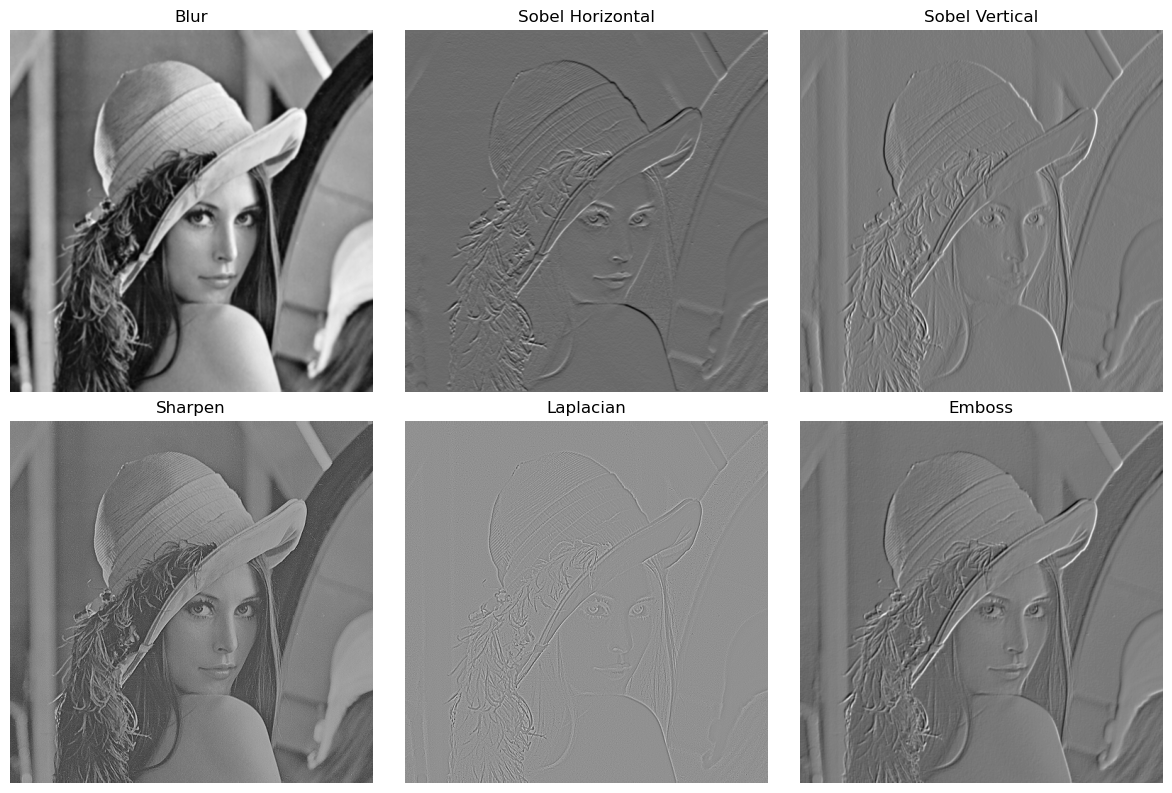

In [114]:
import matplotlib.pyplot as plt

# If you already have the filtered results in memory:
filter_names = ["Blur", "Sobel Horizontal", "Sobel Vertical",
                "Sharpen", "Laplacian", "Emboss"]

plt.figure(figsize=(12, 8))
for i, name in enumerate(filter_names):
    img_path = f"lenna_{name.lower().replace(' ', '_')}.png"
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.subplot(2, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.savefig("lenna_filter_results.png") 
plt.show()


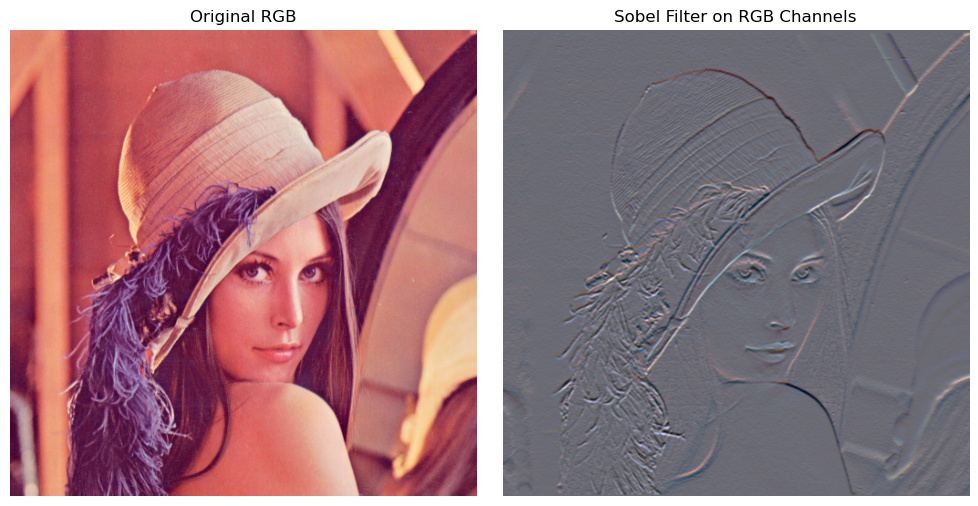

True

In [116]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Charger l'image en RGB
img = cv2.imread("lenna.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Définir un filtre (ex : Sobel horizontal)
sobel_horizontal = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

# Fonction pour appliquer un filtre à chaque canal RGB
def apply_filter_rgb(image_rgb, kernel):
    filtered_channels = []
    for c in range(3):  # R, G, B
        channel = image_rgb[:, :, c]
        filtered = convolve2d(channel, kernel, mode='same', boundary='symm')
        # Normaliser pour rester dans l'intervalle [0,255]
        filtered = cv2.normalize(filtered, None, 0, 255, cv2.NORM_MINMAX)
        filtered_channels.append(filtered.astype(np.uint8))
    return cv2.merge(filtered_channels)

# Appliquer le filtre
filtered_rgb = apply_filter_rgb(img_rgb, sobel_horizontal)

# Afficher le résultat
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original RGB")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_rgb)
plt.title("Sobel Filter on RGB Channels")
plt.axis('off')
plt.tight_layout()
plt.show()

# Sauvegarder le résultat
cv2.imwrite("lenna_sobel_rgb.png", cv2.cvtColor(filtered_rgb, cv2.COLOR_RGB2BGR))


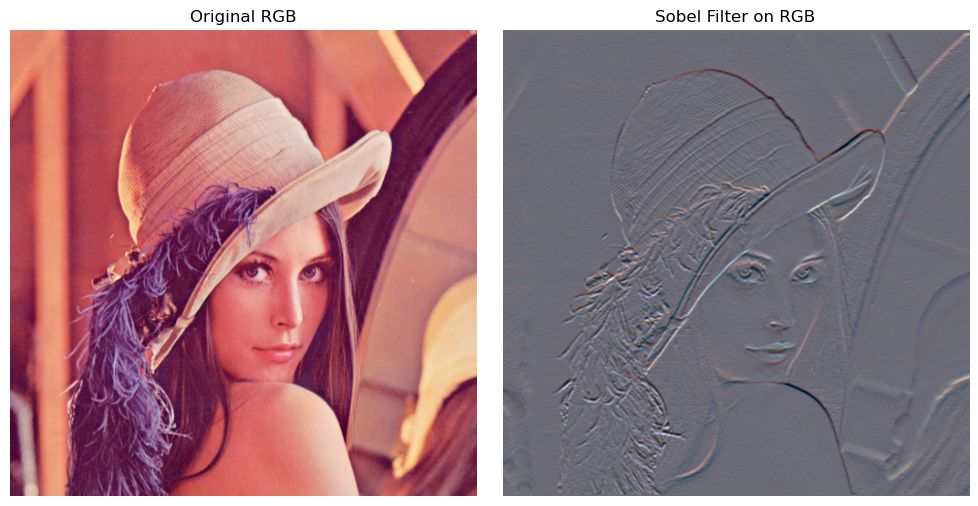

In [118]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Charger l'image et convertir en RGB
img = cv2.imread("lenna.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Définir un filtre (ex: Sobel horizontal)
sobel_horizontal = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)

# Fonction pour appliquer un filtre à chaque canal RGB
def apply_filter_rgb(image_rgb, kernel):
    filtered_channels = []
    for c in range(3):
        channel = image_rgb[:, :, c]
        filtered = convolve2d(channel, kernel, mode='same', boundary='symm')
        filtered = cv2.normalize(filtered, None, 0, 255, cv2.NORM_MINMAX)
        filtered_channels.append(filtered.astype(np.uint8))
    return cv2.merge(filtered_channels)

# Appliquer le filtre
filtered_rgb = apply_filter_rgb(img_rgb, sobel_horizontal)

# Créer une figure côte à côte
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_rgb)
axes[0].set_title("Original RGB")
axes[0].axis("off")

axes[1].imshow(filtered_rgb)
axes[1].set_title("Sobel Filter on RGB")
axes[1].axis("off")

plt.tight_layout()

# Sauvegarder la figure combinée
plt.savefig("lenna_rgb_comparison.png")
plt.show()
